# Submission - Diwa Prasetyo

## Data Preprocessing

### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


### Mengimport dataset

In [3]:
data_url = 'https://github.com/DiwaPrasetyo02/submission-collaborative-filtering/raw/main/Online%20Retail.xlsx'
retail_data = pd.read_excel(data_url)

### Melihat info dataset

In [4]:
print(retail_data.shape)
print(retail_data.info())

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


### Melakukan Pembersihan data

In [5]:

cleaned_data = retail_data[retail_data['Quantity'] > 0]
cleaned_data = cleaned_data.dropna(subset=['CustomerID'])
cleaned_data.drop_duplicates(inplace=True)
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Melakukan Penyesuaian kolom

In [6]:

cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])
cleaned_data['MonthYear'] = cleaned_data['InvoiceDate'].dt.to_period('M')

cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']


numerical_features = cleaned_data[['Quantity', 'UnitPrice', 'TotalPrice']]

### Melakukan perubahan tipe data dan melihat rentang waktu transaksi

In [7]:

retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

start_date = retail_data['InvoiceDate'].min()
end_date = retail_data['InvoiceDate'].max()

start_date, end_date

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

### Visualisasi Jumlah Transaksi Tiap Negara
Grafik batang yang menunjukkan jumlah transaksi untuk setiap negara. Ini memberikan wawasan tentang negara mana yang memiliki jumlah transaksi terbanyak.

<ipython-input-8-c46e9a85d92e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_per_country.index, y=transactions_per_country.values, palette="viridis")


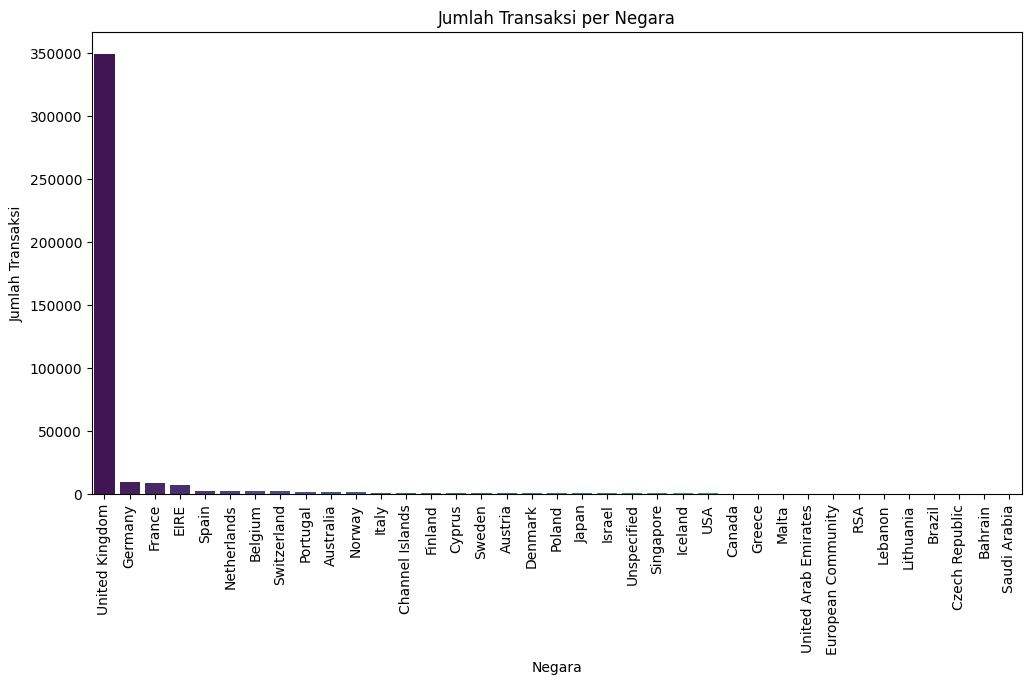

In [8]:
plt.figure(figsize=(12, 6))
transactions_per_country = cleaned_data['Country'].value_counts()
sns.barplot(x=transactions_per_country.index, y=transactions_per_country.values, palette="viridis")
plt.title('Jumlah Transaksi per Negara')
plt.xlabel('Negara')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=90)
plt.show()

### Visualisasi Produk terlaris
Visualisasi ini memberikan wawasan tentang 10 produk mana yang paling populer di antara pelanggan. Ini bisa membantu dalam mengelola persediaan dan merencanakan strategi pemasaran untuk produk-produk yang paling laris.

<ipython-input-9-d5639bb357ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


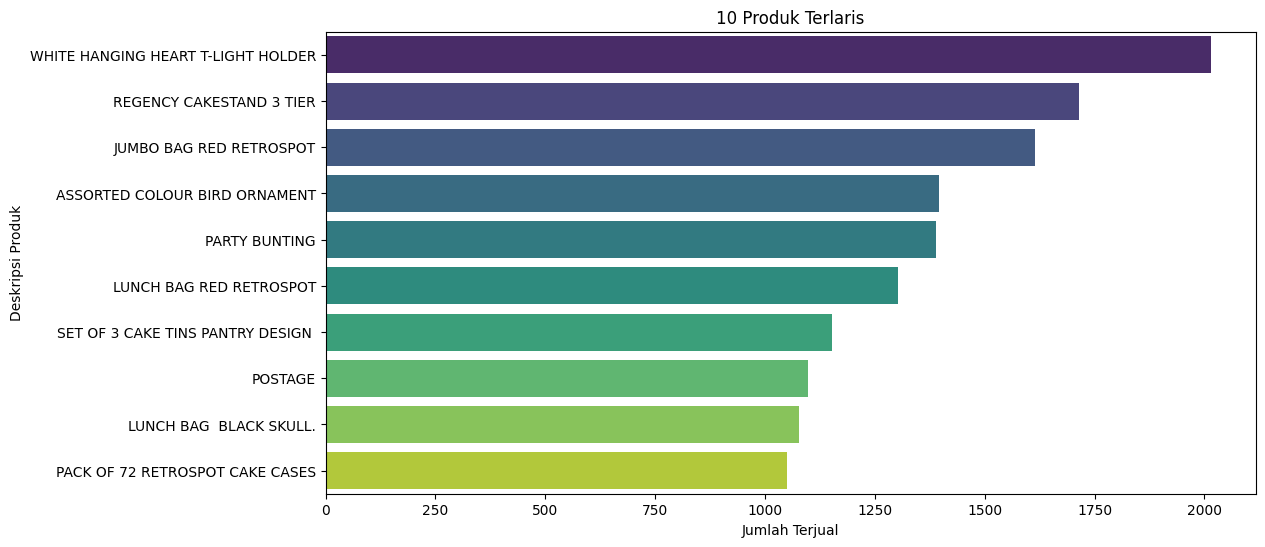

In [9]:
plt.figure(figsize=(12, 6))
top_products = cleaned_data['Description'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title('10 Produk Terlaris')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Deskripsi Produk')
plt.show()

### Visualisasi Hubungan antara Jumlah Item dan Harga Satuan
hubungan antara jumlah item yang dibeli dan harga satuan. Sumbu x dan y menggunakan skala logaritmik untuk menangani rentang nilai yang luas. Ini dapat membantu mengidentifikasi pola atau anomali dalam data pembelian.

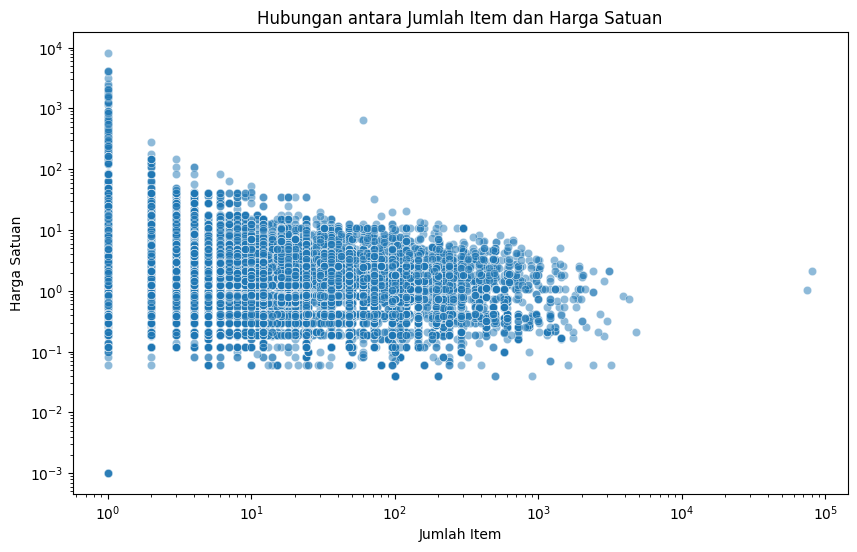

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Hubungan antara Jumlah Item dan Harga Satuan')
plt.xlabel('Jumlah Item')
plt.ylabel('Harga Satuan')
plt.yscale('log')
plt.xscale('log')
plt.show()

### Visualisasi Jumlah Transaksi per Hari dalam Seminggu
Visualisasi ini membantu dalam memahami pola transaksi harian. Misalnya, apakah ada hari tertentu dalam seminggu di mana transaksi lebih banyak terjadi? Ini bisa membantu dalam pengambilan keputusan terkait promosi atau pengaturan stok.

<ipython-input-11-63ebd74b56ae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values, palette="viridis")


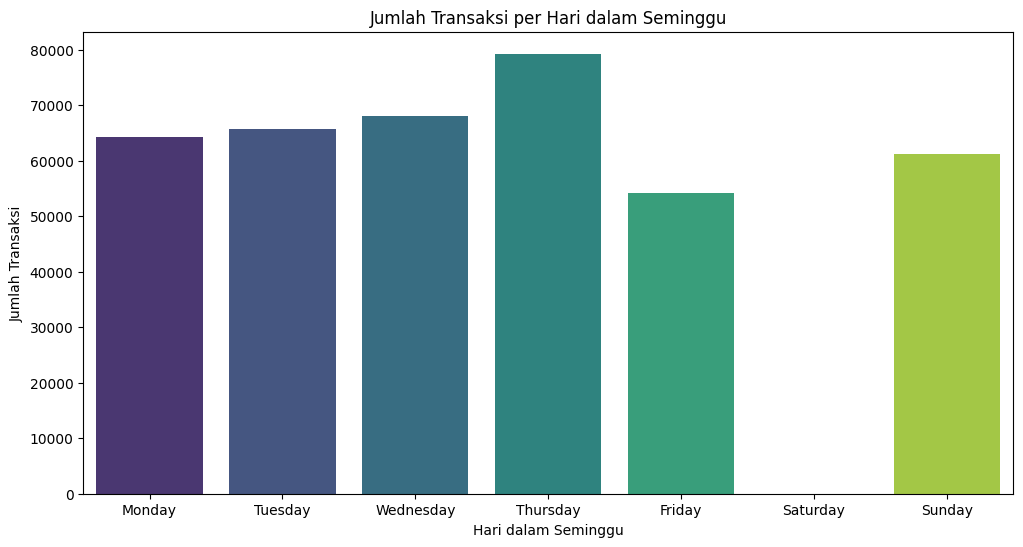

In [11]:
plt.figure(figsize=(12, 6))
cleaned_data['DayOfWeek'] = cleaned_data['InvoiceDate'].dt.day_name()
transactions_per_day = cleaned_data['DayOfWeek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values, palette="viridis")
plt.title('Jumlah Transaksi per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Transaksi')
plt.show()

### Visualisasi Heatmap Korelasi
Heatmap ini menunjukkan korelasi antara fitur-fitur numerik dalam dataset. Angka-angka dalam setiap sel menunjukkan nilai korelasi Pearson antara dua fitur. Warna pada heatmap menunjukkan kekuatan dan arah hubungan; merah tua menunjukkan korelasi positif yang kuat, biru tua menunjukkan korelasi negatif yang kuat, dan warna yang lebih terang menunjukkan korelasi yang lemah.

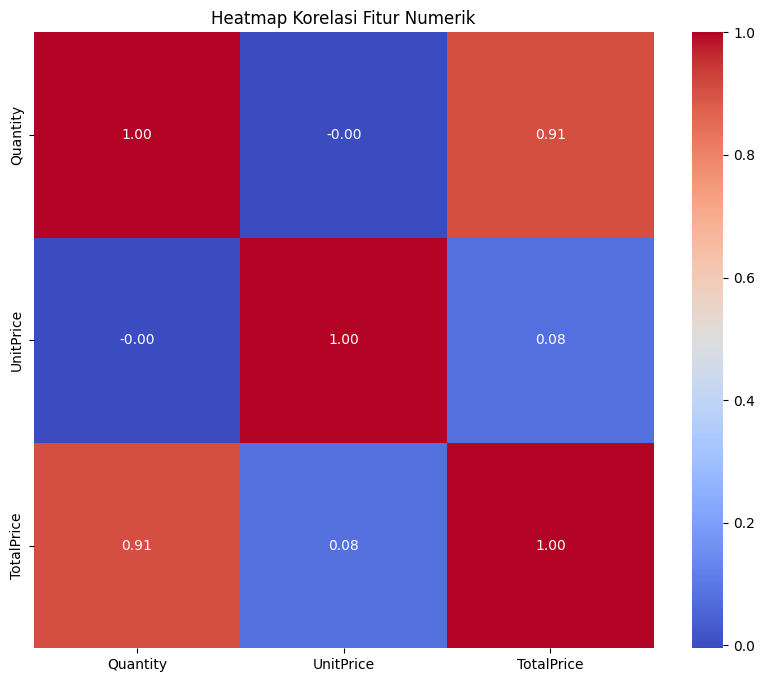

In [12]:
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

### Visualisasi Tren Pendapatan tiap Bulan
Membantu mengidentifikasi tren musiman dan fluktuasi pendapatan dari waktu ke waktu. Misalnya, apakah ada bulan-bulan tertentu dengan pendapatan yang lebih tinggi atau lebih rendah secara konsisten.

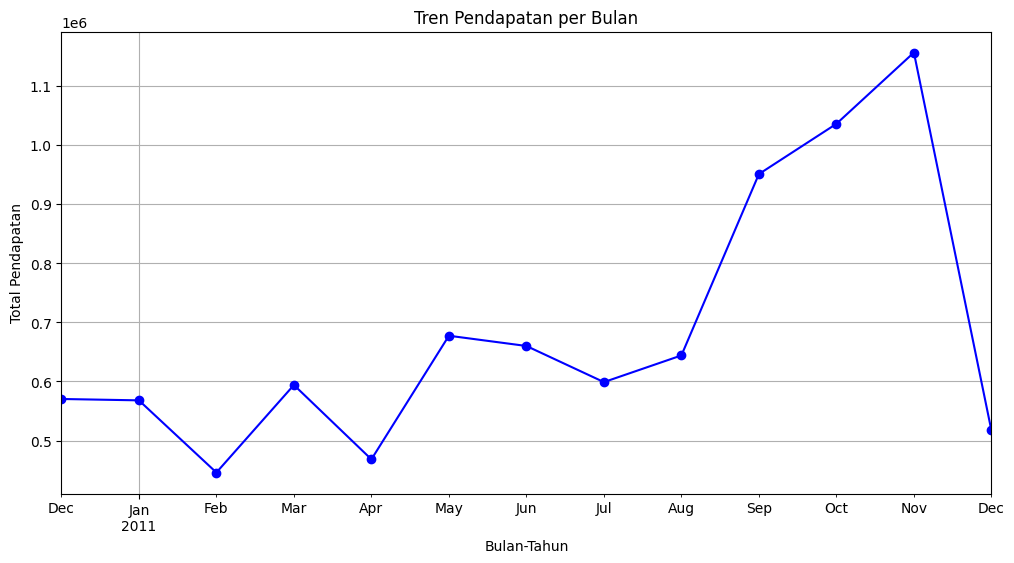

In [13]:
# Calculate monthly revenue
monthly_revenue = cleaned_data.groupby('MonthYear')['TotalPrice'].sum()

# Plot the line chart
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='b')
plt.title('Tren Pendapatan per Bulan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Pendapatan')
plt.grid(True)
plt.show()

## Modeling


### Customer-Item Matrix
Membuat matriks yang disebut Customer-Item Matrix dari data yang sudah dibersihkan (cleaned_data)

In [14]:
# Customer-Item Matrix
customer_item_df = cleaned_data.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)

customer_item_df = customer_item_df.applymap(lambda x: 1 if x > 0 else 0)

### Matriks similaritas antar pengguna
Menghitung matriks similaritas antar pengguna (user-user similarity) berdasarkan matriks Customer-Item yang telah dibuat sebelumnya (customer_item_df).


In [15]:
# Modeling: User-User Similarity
user_similarity_matrix = pd.DataFrame(cosine_similarity(customer_item_df))
user_similarity_matrix.columns = customer_item_df.index
user_similarity_matrix['CustomerID'] = customer_item_df.index
user_similarity_matrix = user_similarity_matrix.set_index('CustomerID')

### Contoh menemukan preferensi pengguna yang mirip

Menemukan pengguna-pengguna yang mirip dengan pengguna dengan CustomerID 12350.0, berdasarkan matriks similaritas pengguna yang telah dihitung sebelumnya (user_similarity_matrix).



In [16]:
# Example of finding similar users
similar_users = user_similarity_matrix.loc[12350.0].sort_values(ascending=False)
print(similar_users.head())

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
Name: 12350.0, dtype: float64


### Mengidentifikasi item-item yang dibeli oleh dua pengguna tertentu
Mengidentifikasi item-item yang dibeli oleh dua pengguna tertentu, yaitu pengguna dengan CustomerID 12350.0 dan 17935.0, dari matriks Customer-Item
`(customer_item_df)`.

In [17]:
# Items bought by a specific user
items_bought_by_user_A = set(customer_item_df.loc[12350.0].iloc[customer_item_df.loc[12350.0].to_numpy().nonzero()].index)
items_bought_by_user_B = set(customer_item_df.loc[17935.0].iloc[customer_item_df.loc[17935.0].to_numpy().nonzero()].index)


### Merekomendasikan item-item yang dibeli oleh pengguna dengan CustomerID 12350.0


In [18]:
# Items to recommend
recommended_items_for_B = items_bought_by_user_A - items_bought_by_user_B
print(cleaned_data.loc[cleaned_data['StockCode'].isin(recommended_items_for_B), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode'))


                               Description
StockCode                                 
21832                 CHOCOLATE CALCULATOR
21915               RED  HARMONICA IN BOX 
22620          4 TRADITIONAL SPINNING TOPS
79066K                      RETRO MOD TRAY
21864      UNION JACK FLAG PASSPORT COVER 
79191C         RETRO PLASTIC ELEPHANT TRAY
21908        CHOCOLATE THIS WAY METAL SIGN
20615         BLUE POLKADOT PASSPORT COVER
20652           BLUE POLKADOT LUGGAGE TAG 
22348          TEA BAG PLATE RED RETROSPOT
22412      METAL SIGN NEIGHBOURHOOD WITCH 
21171                 BATHROOM METAL SIGN 
84086C             PINK/PURPLE RETRO RADIO


### Menghitung matriks similaritas antar item (item-item similarity) berdasarkan matriks Customer-Item (customer_item_df)


In [19]:
# Modeling: Item-Item Similarity
item_similarity_matrix = pd.DataFrame(cosine_similarity(customer_item_df.T))
item_similarity_matrix.columns = customer_item_df.T.index
item_similarity_matrix['StockCode'] = customer_item_df.T.index
item_similarity_matrix = item_similarity_matrix.set_index('StockCode')


### Menambahkan konstanta relevansi antar produk
Menambahkan nilai relevansi antar produk untuk memahami relevansi antar produk guna memberikan rekomendasi yang lebih tepat.


In [20]:
# Relevansi Produk
def calculate_relevance(item_similarity, stock_code):
    similar_items = item_similarity.loc[stock_code].sort_values(ascending=False)
    relevance_constant = similar_items / similar_items.max()
    return relevance_constant

# Contoh menghitung relevansi produk dengan StockCode 23166
relevance_constants = calculate_relevance(item_similarity_matrix, 23166)
print(relevance_constants.head(10))

StockCode
23166    1.000000
23165    0.671897
23167    0.659551
22993    0.274724
23307    0.262526
22722    0.249053
22720    0.249002
22666    0.247110
23243    0.246397
22961    0.242447
Name: 23166, dtype: float64


### Mencari 10 item paling mirip dengan item yang memiliki StockCode 23166 berdasarkan matriks similaritas item-item (item_similarity_matrix)


In [21]:
# Finding top 10 similar items excluding 23166
top_similar_items = item_similarity_matrix.loc[23166].sort_values(ascending=False).iloc[1:11].index
print(cleaned_data.loc[cleaned_data['StockCode'].isin(top_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_similar_items])


                                   Description
StockCode                                     
23165            LARGE CERAMIC TOP STORAGE JAR
23167           SMALL CERAMIC TOP STORAGE JAR 
22993             SET OF 4 PANTRY JELLY MOULDS
23307      SET OF 60 PANTRY DESIGN CAKE CASES 
22722        SET OF 6 SPICE TINS PANTRY DESIGN
22720        SET OF 3 CAKE TINS PANTRY DESIGN 
22666          RECIPE BOX PANTRY YELLOW DESIGN
23243      SET OF TEA COFFEE SUGAR TINS PANTRY
22961                   JAM MAKING SET PRINTED
23306          SET OF 36 DOILIES PANTRY DESIGN
23306           SET OF 36 PANTRY PAPER DOILIES


### Menghitung nilai precision dan recall
Menghitung nilai precision dan recalldari sistem rekomendasi berbasis kolaboratif, dengan menggunakan matriks similaritas antar pengguna (user_similarity) dan matriks similaritas antar item (item_similarity).


In [22]:
# Evaluation
def precision_recall_at_k(user_similarity, item_similarity, user_id, k=10):
    similar_users = user_similarity.loc[user_id].sort_values(ascending=False).iloc[1:k+1].index
    recommended_items = set()
    for similar_user in similar_users:
        recommended_items.update(customer_item_df.loc[similar_user].iloc[customer_item_df.loc[similar_user].to_numpy().nonzero()].index)

    bought_items = set(customer_item_df.loc[user_id].iloc[customer_item_df.loc[user_id].to_numpy().nonzero()].index)
    relevant_items = recommended_items & bought_items

    precision = len(relevant_items) / len(recommended_items) if recommended_items else 0
    recall = len(relevant_items) / len(bought_items) if bought_items else 0

    return precision, recall

# Evaluation with relevance
def precision_recall_with_relevance(user_similarity, item_similarity, user_id, k=10):
    similar_users = user_similarity.loc[user_id].sort_values(ascending=False).iloc[1:k+1].index
    recommended_items = set()
    for similar_user in similar_users:
        recommended_items.update(customer_item_df.loc[similar_user].iloc[customer_item_df.loc[similar_user].to_numpy().nonzero()].index)

    bought_items = set(customer_item_df.loc[user_id].iloc[customer_item_df.loc[user_id].to_numpy().nonzero()].index)
    relevant_items = recommended_items & bought_items

    relevance_scores = {item: item_similarity.loc[item].max() for item in relevant_items}
    precision = len(relevant_items) / len(recommended_items) if recommended_items else 0
    recall = len(relevant_items) / len(bought_items) if bought_items else 0

    return precision, recall, relevance_scores

user_id_example = 12350.0
precision, recall = precision_recall_at_k(user_similarity_matrix, item_similarity_matrix, user_id_example)
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}')

# Evaluation including relevance
precision, recall, relevance_scores = precision_recall_with_relevance(user_similarity_matrix, item_similarity_matrix, user_id_example)
print('Relevance Scores:', relevance_scores)

Precision: 0.04, Recall: 0.71
Relevance Scores: {20615: 0.9999999999999997, 21832: 0.9999999999999998, 21864: 1.0000000000000004, 21866: 1.0, 20652: 1.0, 22412: 1.0000000000000004, 22620: 1.0000000000000002, 21908: 1.0000000000000002, 22551: 1.0000000000000004, 21915: 1.0, 'POST': 0.9999999999999971, 22557: 1.0000000000000004}
